## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
import seaborn as sns

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [7]:
# Loading the ab_data.csv.
df = pd.read_csv('ab_data.csv')

# Printing the first 5 rows.
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [8]:
# Number of rows.
print("Number of rows:", df.shape[0])

Number of rows: 294478


c. The number of unique users in the dataset.

In [9]:
# Number of unique user_id.
print("Number of unique user_id: ", len(df.user_id.unique()))

Number of unique user_id:  290584


d. The proportion of users converted.

In [10]:
# Copying.
df_clean = df.copy()

# Subsetting to remove duplicated user_id.
df_clean = df_clean[np.logical_not(df_clean.user_id.duplicated())]

# Proportion.
sum(df_clean.converted)/len(df_clean)

0.1195695564793657

e. The number of times the `new_page` and `treatment` don't match.

In [11]:
# treatment_non_line_up
treatment_non_line_up = df.query("group == 'treatment'").landing_page.value_counts()[1]


In [12]:
# new_age_non_line_up
new_age_non_line_up = df.query("landing_page == 'new_page'").group.value_counts()[1]

In [13]:
# Non line-up
print("Non line-up: ", treatment_non_line_up + new_age_non_line_up)

Non line-up:  3893


f. Do any of the rows have missing values?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [15]:
# Subsetting the non line-up. New Page and Treatment
aux_1 = df.query("landing_page == 'new_page'").query("group == 'treatment'")

In [16]:
# Subsetting the non line-up. Old Page and Control.
aux_2 = df.query("landing_page == 'old_page'").query("group == 'control'")

In [17]:
# Appending by rows.
df2 = aux_1.append(aux_2)

In [18]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [19]:
# Number of unique user_ids
print("The Number of Unique user_ids:", df2.user_id.nunique())

The Number of Unique user_ids: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [20]:
# Number of repeated user_id
print("Number of repeated user_id:", sum(df2.user_id.duplicated()))

Number of repeated user_id: 1


c. What is the row information for the repeat **user_id**? 

In [21]:
# All information about the duplicated user.
df2[df2.user_id.duplicated()].head()

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [22]:
# Repeated User id
df2[df2.user_id.duplicated()].user_id.tolist()[0]

773192

In [23]:
# Landing page of the Repeated user
df2[df2.user_id.duplicated()].landing_page.tolist()[0]

'new_page'

In [24]:
# Group of the repeated User id
df2[df2.user_id.duplicated()].group.tolist()[0]

'treatment'

In [25]:
# Converted of the repeated User id
df2[df2.user_id.duplicated()].converted.tolist()[0]

0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [26]:
# Removing the duplicated user_id
df2 = df2[np.logical_not(df2.user_id.duplicated())]


In [27]:
# Testing.
print("Number of Duplicated user_id:", sum(df2.user_id.duplicated()))

Number of Duplicated user_id: 0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [29]:
# Converting proportion regardless the page.
p_all = sum(df2.converted)/len(df2.converted)

# Printing.
print("Probability:", p_all)

Probability: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [30]:
# Given it is the control group. What is the converting proportion.
df2.query('group == "control"').converted.mean()
0.1203863045004612

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [31]:
# Given it is the treatment group. What is the converting proportion.
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [32]:
# Calculating the proportion.
(df2.landing_page == "new_page").mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [33]:
# Converting timestamp to date time.
df2['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculating the elapsed time from the beginning to the end.
df2.timestamp.max() - df2.timestamp.min()

Timedelta('21 days 23:59:49.081927')

According to the analysis  there is no sufficient evidence to say that the new treatment page leads to more conversions.. As the converting rate is similar in both cases so it is important to consider other factors.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

I want to prove and assure that the  new website has better performance than the older one.

Null Hypothesis: The old version has better or equal performance than the newer version.
Alternative Hypothesis: The new version is better than the older one.

-Converting these statments in Hypoteses Testing:

H0:pnew − pold ≤0
H1:pnew − pold >0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [56]:
# p_new and p_old are equal according to the instructions.
p_new = df2.converted.mean()



In [57]:
print("p_new: ", p_new)

p_new:  0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [58]:
# p_new and p_old are equal according to the instructions.
p_old = df2.converted.mean()



In [59]:
print("p_old: ", p_old)

p_old:  0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [60]:
# Number of observations when landing_page is equal to new_page.
num_new = df2.query('landing_page == "new_page"').shape[0]

print("n_new: ", num_new)

n_new:  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [61]:
# Number of observations when landing_page is equal to old_page.
num_old = df2.query('landing_page == "old_page"').shape[0]

print("n_old: ", num_old)


n_old:  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [62]:
new_page_converted = np.random.choice([0, 1], num_new, p = [p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [63]:

old_page_converted = np.random.choice([0, 1], num_old, p = [p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [64]:
# differences computed in from p_new and p_old
difference= new_page_converted.mean() - old_page_converted.mean()# differences computed in from p_new and p_old
difference

-0.00061062233694397783

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [65]:
p_diffs,bs_newMeans ,bs_oldMeans  = [], [], []


In [66]:
for _ in range (10000):
    bsNew = np.random.choice(2, size=num_new ,p=[p_new,1 - p_new])
    bsOld = np.random.choice(2, size=num_old ,p=[p_old,1 - p_old])
    bs_newMeans.append(bsNew.mean())
    bs_oldMeans.append(bsOld.mean())
    p_diffs.append(bsNew.mean() - bsOld.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

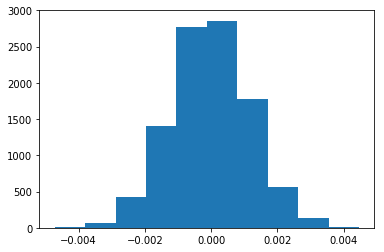

In [69]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [70]:
actual_diff = df2.query('landing_page == "new_page"').converted.mean() - \
                       df2.query('landing_page == "old_page"').converted.mean()


In [72]:
(p_diffs > actual_diff).mean()

0.9083

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value we calculated in j is called p-value .which is the probability that we will observe this statistic, given the null hypothesis is true. Since Our p-value is exceeds the critical value of 0.05 in this case and so we fail to reject the null hypothesis, we cannot assume the new page converts more users than the old page. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [73]:
import statsmodels.api as sm

conv_old = len(df2.query('converted==1 and landing_page=="old_page"')) #rows converted with old_page
conv_new = len(df2.query('converted==1 and landing_page=="new_page"')) #rows converted with new_page
num_old = len(df2.query('landing_page=="old_page"')) #rows_associated with old_page
num_new = len(df2.query('landing_page=="new_page"')) #rows associated with new_page
num_new

145310

In [74]:
# Priting.
print("convert_old:", conv_old)
print("n_old:", num_old)
print("convert_new:", conv_new)
print("n_new:", num_new)

convert_old: 17489
n_old: 145274
convert_new: 17264
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [75]:
z_score, p_value = sm.stats.proportions_ztest([conv_old,conv_new],[num_old,num_new],alternative='smaller')



In [76]:
#display z_score and p_value
print(z_score,p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [52]:
from scipy.stats import norm
print(norm.cdf(z_score)) #Z-score significant 
print(norm.ppf(1-(0.05/2))) #  critical value at 95% confidence 

0.905058312759
1.95996398454


According to the Z-SCORE 0.05 calculated above , it is considered that there is no difference in converting users from the old page and new page.and we cannot reject the null hypothesis.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

in this case we will use the Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [70]:
#adding an intercept column
df2['intercept'] = 1
# create dummy variables 
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])


In [71]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [31]:
import statsmodels.api as sm
log_model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=log_model.fit()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-03 17:01 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value found in the logistic regression model(0.19) .And since it is larger than our Type 1 error rate of .05, that means the landing page is not statistically significant in predicting whether the
viewer converts or not. 

In [33]:
In Logistic regression :H0:pnew−pold=0
                        H1:pnew−pold!=0
                
Part II  : H0:pnew−pold<=0
        H1:pnew−pold>0


SyntaxError: invalid syntax (<ipython-input-33-cf3ef62984e5>, line 1)

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

-Additional factors should be added into the regression models they may also influence the conversions also.Such as (age) .
 
-there will be disadvantage of adding additional terms into the  regression model which called  multicollinearility,it  means that one factor is related to another. As our additional factor changes every time on the basis of an additional factor


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [73]:
country_df = pd.read_csv('countries.csv')
inner_join = country_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
inner_join.head(5)


,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [74]:
### Creating dummy variables
inner_join[['ca', 'uk', 'us']] = pd.get_dummies(inner_join['country'])
inner_join.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,ca,uk,us
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


In [79]:
logit3 = sm.Logit(inner_join['converted'], inner_join[['intercept', 'us', 'uk' ]])
logit3

In [41]:
inner_join['US_ab_page'] = inner_join['US']*inner_join['ab_page']
inner_join.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [42]:
inner_join['UK_ab_page'] = inner_join['UK']*inner_join['ab_page']
inner_join.head()


,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


In [58]:
logit3 = sm.Logit(inner_join['converted'], inner_join[['intercept', 'US', 'UK' ]])
logit3

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [82]:

# Create additional columns specifying what user/country converted
inner_join['us_page'] = inner_join['us'] * inner_join['ab_page']
inner_join['uk_page'] = inner_join['uk'] * inner_join['ab_page']
inner_join.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,ca,uk,us,us_page,uk_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0,1


In [67]:
### Fitting Linear Model And Obtain the Results
log_mod = sm.Logit(inner_join['converted'], inner_join[['intercept', 'ab_page', 'US', 'UK', 'us_page', 'uk_page']])
result = log_mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-03 17:19 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
us_page        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
uk_page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

In [83]:


#Check the result
final_result = logit3.fit()
final_result.summary2()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-03 17:31 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
us             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
uk             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

In [100]:

# Effect of each variale. Baseline: US and control.
round(np.exp(final_result.params[1:]), 2)

ab_page    0.99
US         1.04
UK         1.05
dtype: float64

Conclusion : 

 The conclusion in all of them is that the new page did not prove to be better than the old page and we do not have the evidence to switch to the new page. None of the variables have significant p-values. Therefore, we will fail to reject the null and conclude that there is not sufficient evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not.




In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])